<h1 style="text-align: center; font-weight: bold; font-size: 2.5em;">Sistema de Recomendación de Locales Gastronómicos</h1>


## Introducción
Este proyecto busca desarrollar un sistema de recomendación que satisfaga las necesidades tanto de inversores interesados en identificar oportunidades gastronómicas rentables como de consumidores que desean explorar opciones de calidad. A través de técnicas de análisis de datos y aprendizaje automático, se construirán recomendaciones personalizadas.

En este caso, se analizará uno de los archivos clave del proyecto, el cual contiene información detallada sobre las reseñas (reviews) y las puntuaciones otorgadas (stars) a los locales gastronómicos por parte de los usuarios. Estos datos serán esenciales para comprender las preferencias de los consumidores y evaluar el desempeño de los locales, formando la base para las recomendaciones.

---

## Dataset y Documentación de Yelp

Para el desarrollo de este proyecto, utilizaremos el dataset público proporcionado por Yelp, el cual contiene información valiosa sobre negocios, reseñas, puntuaciones y datos relacionados. Puedes acceder a los recursos necesarios en los siguientes enlaces:

- **[Descargar el dataset de Yelp](https://www.yelp.com/dataset)**: Aquí podrás obtener el archivo completo con los datos en formato JSON.
- **[Documentación oficial del dataset](https://www.yelp.com/dataset/documentation/main)**: Consulta detalles sobre las estructuras de datos, descripciones de columnas y ejemplos para facilitar el análisis.

Estos recursos serán esenciales para construir nuestro sistema de recomendación, permitiendo extraer insights clave sobre las preferencias de los consumidores y el desempeño de los locales gastronómicos.

## Descripción de los datos (Diccionario)

Este JSON describe una reseña escrita por un usuario en un sistema de reseñas, relacionado con un negocio (como un restaurante o tienda) en una plataforma como Yelp. Vamos a desglosar cada columna (campo) y su significado:

### 1. **review_id**:
   - **Tipo**: Cadena de texto (string).
   - **Descripción**: Es un identificador único de 22 caracteres que se asigna a cada reseña. Sirve para distinguir una reseña de otras en el sistema.

### 2. **user_id**:
   - **Tipo**: Cadena de texto (string).
   - **Descripción**: Es un identificador único de 22 caracteres para el usuario que escribió la reseña. Este identificador se utiliza para vincular la reseña con el usuario en el archivo de usuarios (`user.json`).

### 3. **business_id**:
   - **Tipo**: Cadena de texto (string).
   - **Descripción**: Es un identificador único de 22 caracteres que representa el negocio o establecimiento (como un restaurante, tienda, etc.) sobre el cual se ha escrito la reseña. Este identificador se utiliza para vincular la reseña con un negocio en el archivo de negocios (`business.json`).

### 4. **stars**:
   - **Tipo**: Entero (integer).
   - **Descripción**: Representa la calificación en estrellas dada por el usuario al negocio. El valor puede ir típicamente de 1 a 5, donde 1 es la calificación más baja y 5 la más alta.

### 5. **date**:
   - **Tipo**: Cadena de texto (string) con formato de fecha `YYYY-MM-DD`.
   - **Descripción**: Es la fecha en la que se escribió la reseña, en formato de fecha estándar (año-mes-día).

### 6. **text**:
   - **Tipo**: Cadena de texto (string).
   - **Descripción**: Es el texto de la reseña escrita por el usuario. Aquí el usuario puede detallar su experiencia en el negocio, mencionando aspectos como la calidad del servicio, ambiente, precios, etc.

### 7. **useful**:
   - **Tipo**: Entero (integer).
   - **Descripción**: Es el número de votos "útiles" que ha recibido la reseña. Los usuarios pueden votar si consideran que la reseña les fue útil o relevante.

### 8. **funny**:
   - **Tipo**: Entero (integer).
   - **Descripción**: Es el número de votos "graciosos" que ha recibido la reseña. Los usuarios pueden votar si encuentran la reseña divertida o graciosa.

### 9. **cool**:
   - **Tipo**: Entero (integer).
   - **Descripción**: Es el número de votos "geniales" o "cool" que ha recibido la reseña. Similar a los otros tipos de votos, pero con un enfoque en la apreciación general de la reseña.



---

## Procesamiento 
### Paso 1: Carga de datos




Dado que el archivo JSON de Yelp es muy grande y podría generar problemas de falta de memoria al intentar cargarlo en su totalidad, se ha implementado una estrategia para leer y procesar el archivo en partes más pequeñas. A continuación, se describe el proceso seguido:

1. **Lectura del archivo JSON por partes**:
   El archivo JSON se divide en 7 partes, cada una de aproximadamente 1,000,000 de registros. Esto permite manejar los datos de manera más eficiente y evitar problemas de memoria. Las partes se nombran de la siguiente manera:
   - **Parte 0**: Contiene los primeros 1,000,000 de registros.
   - **Parte 1**: Contiene los siguientes 1,000,000 de registros.
   - ...
   - **Parte 7**: Contiene los últimos 1,000,000 de registros.

2. **Carga de las partes en DataFrames**:
   Cada parte se carga de manera individual en un DataFrame para su procesamiento:
   ```python
   df0 = pd.read_json('parte0.json', lines=True)
   df1 = pd.read_json('parte1.json', lines=True)
   df2 = pd.read_json('parte2.json', lines=True)
   # Y así sucesivamente para cada parte hasta df7


- ### Se importan las librerías necesarias para el Procesamiento y Análisis

In [1]:
# Se importan las librerías a utilizar
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

In [ ]:
# Se utiliza pd.read_json() con el parámetro lines=True para leer el archivo JSON línea por línea.
# El parámetro chunksize permite leer el archivo en fragmentos de tamaño especificado,
# lo que facilita el procesamiento de archivos grandes sin sobrecargar la memoria.

# Iteramos sobre cada fragmento (chunk) del archivo JSON utilizando un bucle con enumerate().
# Esto nos permite acceder al índice de cada fragmento y procesarlo de manera eficiente.
for i, chunk in enumerate(pd.read_json(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\yelp_academic_dataset_review.json', lines=True, chunksize=1000000)):
    
    # Guardamos cada fragmento como un archivo Parquet, usando un nombre único basado en el índice de la iteración.
    # Esto permite guardar los datos de manera eficiente en varios archivos Parquet, 
    # lo que es más eficiente tanto en términos de espacio como de velocidad de lectura.
    
    chunk.to_parquet(f"parte_{i}.parquet")


In [ ]:
# Leer archivo Parquet
df_0 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_0.parquet')

In [ ]:
# Leer archivo Parquet
df_1 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_1.parquet')

In [ ]:
# Leer archivo Parquet
df_2 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_2.parquet')

In [ ]:
# Leer archivo Parquet
df_3 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_3.parquet')

In [ ]:
# Leer archivo Parquet
df_4 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_4.parquet')

In [ ]:
# Leer archivo Parquet
df_5 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_5.parquet')

In [ ]:
# Leer archivo Parquet
df_6 = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\parte_6.parquet')

In [ ]:
# Concatenamos el DataFrame 'df_0' al final de 'df_1' para crear df y reiniciamos los índices en el DataFrame resultante.
# Esto asegura que los índices sean secuenciales y elimina posibles duplicados de índices entre los DataFrames originales.
df = pd.concat([df_0, df_1], ignore_index=True)

In [ ]:
# Concatenamos el DataFrame 'df_2' al final de 'df' y reiniciamos los índices en el DataFrame resultante.
# Esto asegura que los índices sean secuenciales y elimina posibles duplicados de índices entre los DataFrames originales.
df = pd.concat([df, df_2], ignore_index=True)

In [ ]:
# Concatenamos el DataFrame 'df_3' al final de 'df' y reiniciamos los índices en el DataFrame resultante.
# Esto asegura que los índices sean secuenciales y elimina posibles duplicados de índices entre los DataFrames originales.
df = pd.concat([df, df_3], ignore_index=True)

In [ ]:
# Concatenamos el DataFrame 'df_4' al final de 'df' y reiniciamos los índices en el DataFrame resultante.
# Esto asegura que los índices sean secuenciales y elimina posibles duplicados de índices entre los DataFrames originales.
df = pd.concat([df, df_4], ignore_index=True)

In [ ]:
# Concatenamos el DataFrame 'df_5' al final de 'df' y reiniciamos los índices en el DataFrame resultante.
# Esto asegura que los índices sean secuenciales y elimina posibles duplicados de índices entre los DataFrames originales.
df = pd.concat([df, df_5], ignore_index=True)

In [ ]:
# Concatenamos el DataFrame 'df_6' al final de 'df' y reiniciamos los índices en el DataFrame resultante.
# Esto asegura que los índices sean secuenciales y elimina posibles duplicados de índices entre los DataFrames originales.
df = pd.concat([df, df_6], ignore_index=True)


### Explicación del flujo:
1. **División en partes**: Esto se hace para evitar problemas de memoria.
2. **Carga parcial**: Cada fragmento del archivo se carga en un DataFrame por separado.
3. **Concatenación**: Los DataFrames se combinan para formar un único conjunto de datos listo para el análisis.

Este proceso te permite manejar de manera eficiente archivos grandes y asegurarte de que el análisis pueda continuar sin cuellos de botella debido a la falta de memoria.


---

### Paso 2: Concatenación de Datos Filtrados

Tras aplicar un filtro al dataset de **`business`**, seleccionando únicamente las categorías relacionadas con gastronomía, se procede a concatenar los datos resultantes con el DataFrame original. Este paso es fundamental para garantizar que el análisis se enfoque exclusivamente en locales gastronómicos. 

#### Detalles del Proceso:
1. **Filtrado del Dataset**:  
   Se seleccionaron del dataset `business` únicamente las filas cuya categoría corresponde a negocios gastronómicos (como restaurantes, cafeterías, bares, entre otros).

2. **Concatenación de Datos**:  
   Los datos filtrados se almacenaron en un DataFrame (`df_2`). Este DataFrame se combina con el original (`df`) utilizando la función `pd.concat()`.  
   - **Razón**: Esto permite mantener en un solo lugar los datos que cumplen con el criterio de selección.
   - **Parámetro `ignore_index=True`**: Reinicia los índices del DataFrame resultante, asegurando que sean consecutivos y consistentes.

3. **Propósito**:  
   Este paso facilita la identificación de las reseñas relevantes en el dataset de **`review`**, seleccionando únicamente aquellas filas que correspondan a los locales gastronómicos previamente filtrados.



---

-  ####  Carga del Dataset de Reseñas (Review)

Se carga el archivo **`df_yelp_review_filtrado.parquet`**, que contiene las reseñas de los negocios, en un DataFrame **`df`**. Este archivo será utilizado como base para el análisis posterior. La función utilizada es **`pd.read_parquet()`**, que permite leer archivos **Parquet**, un formato eficiente para almacenar grandes volúmenes de datos.


In [ ]:
df = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\df_yelp_review_filtrado.parquet')

- #### Carga del Dataset de Restaurantes
Se carga el archivo **restaurantes.csv** en un DataFrame `df_restaurantes`. Este archivo contiene los datos de los locales gastronómicos. Posteriormente, se utilizará para filtrar las reseñas y quedarnos únicamente con las que corresponden a estos locales. La función utilizada es `pd.read_csv()`, que permite leer archivos CSV.

In [ ]:
df_restaurantes = pd.read_csv(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\restaurantes.csv', index_col=0)

In [ ]:
df_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52268 entries, 0 to 52267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       51825 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52247 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51703 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         44990 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.0+ MB


- #### Creación de la Variable de Filtro
A continuación, se extrae la columna `business_id` del DataFrame `df_restaurantes` y se convierte en un array de NumPy. Esta variable `df_filtro` contendrá los identificadores de los locales gastronómicos y será utilizada para filtrar las reseñas en el siguiente paso.



In [ ]:
df_filtro = df_restaurantes['business_id'].to_numpy()

- #### Filtrado del Dataset de Reseñas
El siguiente paso consiste en filtrar las filas del DataFrame `df` para que contenga solo las reseñas de los locales gastronómicos. Este filtro se realiza utilizando la función `isin()`, que permite seleccionar las filas en las que el `business_id` de la reseña se encuentra dentro de los identificadores presentes en `df_filtro`.



In [ ]:
df = df[df['business_id'].isin(df_filtro)]  

- #### Visualización General de los Datos
Una vez realizado el filtrado, se utiliza el método `info()` para obtener información general sobre el DataFrame filtrado. Esta función proporciona detalles sobre la cantidad de registros, los tipos de datos de las columnas y la presencia de valores nulos, lo que ayuda a tener una visión general de la calidad de los datos.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4724471 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 360.4+ MB


- #### Visualización Aleatoria de Registros
A continuación, se realiza una visualización aleatoria de 5 registros con el método `sample(5)`. Esto permite obtener una muestra representativa de los datos filtrados y verificar que el proceso de filtrado se haya realizado correctamente.


In [ ]:
df.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
669806,Y6a45pyp41IksSwsFljvUQ,DMv-Ti2LE4n09uLdvYrUJA,s4r3OEFu8q1HAB06CnEPCA,5,0,0,0,"Top Quality experience! \nFriendly staff, grea...",2018-11-18 20:38:26
400174,Uhw7j2CmETyCFqly1vU5AQ,BdTzWB7qXO-ZGl-jRXw7PQ,cg4JFJcCxRTTMmcg9O9KtA,4,0,1,1,Good location and nice place. Need A better s...,2014-12-11 18:34:20
4308029,FWKrbU-_U9qvVlIJq-akiw,39MMfuCNnq73mB1_B31LAQ,8NyDM-FDoWEEeEG9XUwnbg,5,0,0,0,"Outstanding food quality, excellent service an...",2015-03-11 19:43:39
2342614,ykR5mMOofR6RKMr_4tqMjQ,K0N1tOxkTFyEhjZD-xDxwQ,6jAY3-uTMLbq-RJfWliV1w,1,1,0,0,it smelled like sewer inside the restaurant. t...,2012-04-27 06:29:30
801581,qqmNeDZquxwKW3ZIzd5HdA,_WS_X27Yw8DX3QzaT4f-rg,-FMI0_EhMjwXaAgHVGuG2Q,4,0,0,1,After my review I was contacted by someone fro...,2013-12-12 05:42:48



- #### Guardado de los Datos Filtrados
Finalmente, se guarda el DataFrame filtrado en un archivo **Parquet** comprimido para su posterior análisis. El archivo resultante se guarda con el nombre `df_yelp_review_filtrado.parquet`. Este formato es eficiente para almacenar grandes volúmenes de datos y facilita la carga y procesamiento de los mismos en etapas posteriores.


In [ ]:
df.to_parquet(f"df_yelp_review_filtrado.parquet")

- #### Selección de Columnas Relevantes de Restaurantes
En este paso, seleccionamos las columnas relevantes del DataFrame `df_restaurantes`, específicamente **'name'**, **'business_id'**, y **'state'**. Estas columnas son necesarias para enriquecer las reseñas con el nombre del restaurante y su ubicación (estado).




In [ ]:
df_restaurantes[['name', 'business_id', 'state']].head()

,name,business_id,state
0,St Honore Pastries,MTSW4McQd7CbVtyjqoe9mw,PA
1,Sonic Drive-In,CF33F8-E6oudUQ46HnavjQ,TN
2,Tsevi's Pub And Grill,k0hlBqXX-Bt0vf1op7Jr1w,MO
3,Sonic Drive-In,bBDDEgkFA1Otx9Lfe7BZUQ,TN
4,Vietnamese Food Truck,eEOYSgkmpB90uNA7lDOMRA,FL


- #### Fusión de los DataFrames
A continuación, fusionamos el DataFrame de reseñas df con el DataFrame de restaurantes df_restaurantes, utilizando el business_id como clave de unión. Se utiliza una unión de tipo left (how='left') para asegurarnos de que todas las reseñas estén presentes en el DataFrame final, incluso si algunos restaurantes no tienen información asociada.

In [ ]:
df = pd.merge(df, df_restaurantes[['business_id', 'name', 'state']], on='business_id', how='left')


### Resumen del Procedimiento

1. **Carga de los Datos:**  
   Se cargan los archivos de reseñas y de locales gastronómicos en sus respectivos DataFrames.

2. **Filtrado de las Reseñas:**  
   Se filtran las reseñas para seleccionar solo aquellas correspondientes a los locales gastronómicos presentes en el dataset de restaurantes.

3. **Visualización de los Datos:**  
   Se realiza una inspección de los datos filtrados para verificar su estructura y calidad.

4. **Guardado de los Datos Filtrados:**  
   Se guarda el DataFrame final con los datos filtrados en un archivo **Parquet** para su posterior análisis.

5. **Selección de Columnas Relevantes de Restaurantes:**  
   Se seleccionan las columnas **'name'**, **'business_id'**, y **'state'** del DataFrame de restaurantes para enriquecer las reseñas con información relevante del restaurante.

6. **Fusión de los DataFrames:**  
   Se realiza una fusión entre el DataFrame de reseñas y el de restaurantes, utilizando el `business_id` como clave para unir ambas tablas. Esto permite asociar las reseñas con el nombre y la ubicación del restaurante.

Este procedimiento asegura que solo se trabajará con las reseñas de los locales gastronómicos, lo cual es crucial para la construcción del sistema de recomendación de restaurantes.


In [ ]:
# Se guarda el DataFrame Final para comenzar con el análisis y procesamiento
df.to_parquet(f"df_yelp_review_filtrado_final.parquet")

---
---

# Limpieza y Análisis del Dataset:

Luego de realizar la lectura del Dataframe original, seleccionar las filas que nos interesan para nuestro proyecto y Fusionar ambos para agregar variables que no se encontraban en el original, para un mejor análisis.

In [2]:
# Lectura del Dataframe Final
df = pd.read_parquet(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\ETL\df_yelp_review_filtrado_final.parquet')

## Visualizacion del dataframe y las Variables

In [3]:
# Se Seleccionan para visualización de las 5 primeras filas
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,state
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,PA
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,AZ
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,PA
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,LA
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,PA


In [4]:
# Forma del Df
df.shape

(4724471, 11)

In [5]:
# Información General del Df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724471 entries, 0 to 4724470
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   name         object        
 10  state        object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 396.5+ MB


### Descripción del DataFrame

#### Información General
- **Total de Filas**: 4,724,471  
- **Total de Columnas**: 11  
- **Tamaño en Memoria**: 396.5+ MB  

#### Descripción de las Columnas

1. **`review_id`** (`object`):  
   Identificador único para cada reseña.

2. **`user_id`** (`object`):  
   Identificador único del usuario que publicó la reseña.

3. **`business_id`** (`object`):  
   Identificador único del negocio al que corresponde la reseña.

4. **`stars`** (`int64`):  
   Calificación asignada por el usuario, generalmente en una escala de 1 a 5 estrellas.

5. **`useful`** (`int64`):  
   Cantidad de usuarios que marcaron la reseña como "útil".

6. **`funny`** (`int64`):  
   Cantidad de usuarios que marcaron la reseña como "divertida".

7. **`cool`** (`int64`):  
   Cantidad de usuarios que marcaron la reseña como "genial".

8. **`text`** (`object`):  
   Texto completo de la reseña publicada.

9. **`date`** (`datetime64[ns]`):  
   Fecha en que la reseña fue publicada.

10. **`name`** (`object`):  
   Nombre del negocio al que corresponde la reseña.

11. **`state`** (`object`):  
   Estado geográfico en el que se encuentra el negocio.

#### Observaciones
Este DataFrame contiene información detallada sobre reseñas realizadas por usuarios a diferentes negocios, lo que permite realizar análisis relacionados con satisfacción del cliente, tendencias geográficas, y comportamientos de los usuarios.


## Valores Nulos:

In [6]:
# Suma de Nulos por Columnas
df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
name           0
state          0
dtype: int64

#### Observacion

- No se observan Valores Nulos en ninguna de las Variables.

## Duplicados

In [7]:
# Verificar si se encuentran Duplicados
filas_duplicadas = df.duplicated().sum()
print(f'Cantidad de filas Duplicadas: {filas_duplicadas}')

Cantidad de filas Duplicadas: 0


Este método considera duplicadas aquellas filas que tienen los mismos valores en todas las columnas.

## Columnas

In [8]:
# Eliminamos las columnas que no son necesarias en nuestro criterio
df = df.drop(columns=['useful', 'funny', 'cool'])

#### Eliminación de Columnas Irrelevantes

##### Decisión
Se ha decidido **eliminar las columnas `useful`, `funny` y `cool`** por las siguientes razones:

1. Estas columnas representan puntuaciones relacionadas con las reseñas individuales (`comentarios`) y no proporcionan información directa sobre los **comercios** que estamos analizando.
2. Para evaluar la calidad del comercio, utilizaremos la columna **`stars`**, que es una calificación directa asignada al negocio por los usuarios.

### Estrategia de Análisis
- En lugar de analizar las puntuaciones de los comentarios, realizaremos un **Análisis de Sentimiento** sobre el contenido textual de las reseñas (columna **`text`**).  
- Esto nos permitirá identificar patrones y determinar la **calidad de los comentarios** desde una perspectiva más cualitativa.

### Resultado
El DataFrame actualizado tendrá una estructura más enfocada en las variables esenciales para el análisis, eliminando datos redundantes o no alineados con los objetivos del proyecto.


### Tipo de Variables

In [9]:
# Tipo de Dato de cada variable
print(df.dtypes)

review_id              object
user_id                object
business_id            object
stars                   int64
text                   object
date           datetime64[ns]
name                   object
state                  object
dtype: object


In [10]:
# Cantidad de tipo de variable
df.dtypes.value_counts()

object            6
int64             1
datetime64[ns]    1
Name: count, dtype: int64

#### Observación
Los tipos de datos se encuentran correctamente asignados, lo que asegura que cada columna puede ser utilizada de manera adecuada para el análisis y procesamiento de datos. Esto incluye:

- **Datos categóricos y de texto** almacenados como `object`.  
- **Valores numéricos** correctamente representados como `int64`.  
- **Fechas y tiempos** manejados con precisión en el formato `datetime64[ns]`.


## Analisis Univariado de Variables

In [33]:
# Establecer tema con más personalización
sns.set_theme(style="whitegrid", palette="viridis", font="Arial", rc={"axes.titlesize": 16, "axes.labelsize": 12})

### Variables Numéricas

In [12]:
# Información Estadística 
df['stars'].describe()

count    4.724471e+06
mean     3.793798e+00
std      1.391227e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [13]:
# Calcular la frecuencia y los porcentajes
valores = df['stars'].value_counts()
valores_porcentajes = df['stars'].value_counts(normalize=True) * 100

# Crear un DataFrame con ambas columnas y redondear los porcentajes
df_frecuencia = pd.DataFrame({
    'Frecuencia': valores,
    'Porcentaje': valores_porcentajes.round(2).astype(str) + '%'
})

# Mostrar el DataFrame
df_frecuencia


,Frecuencia,Porcentaje
stars,,
5,2079441,44.01%
4,1130251,23.92%
1,567185,12.01%
3,543108,11.5%
2,404486,8.56%


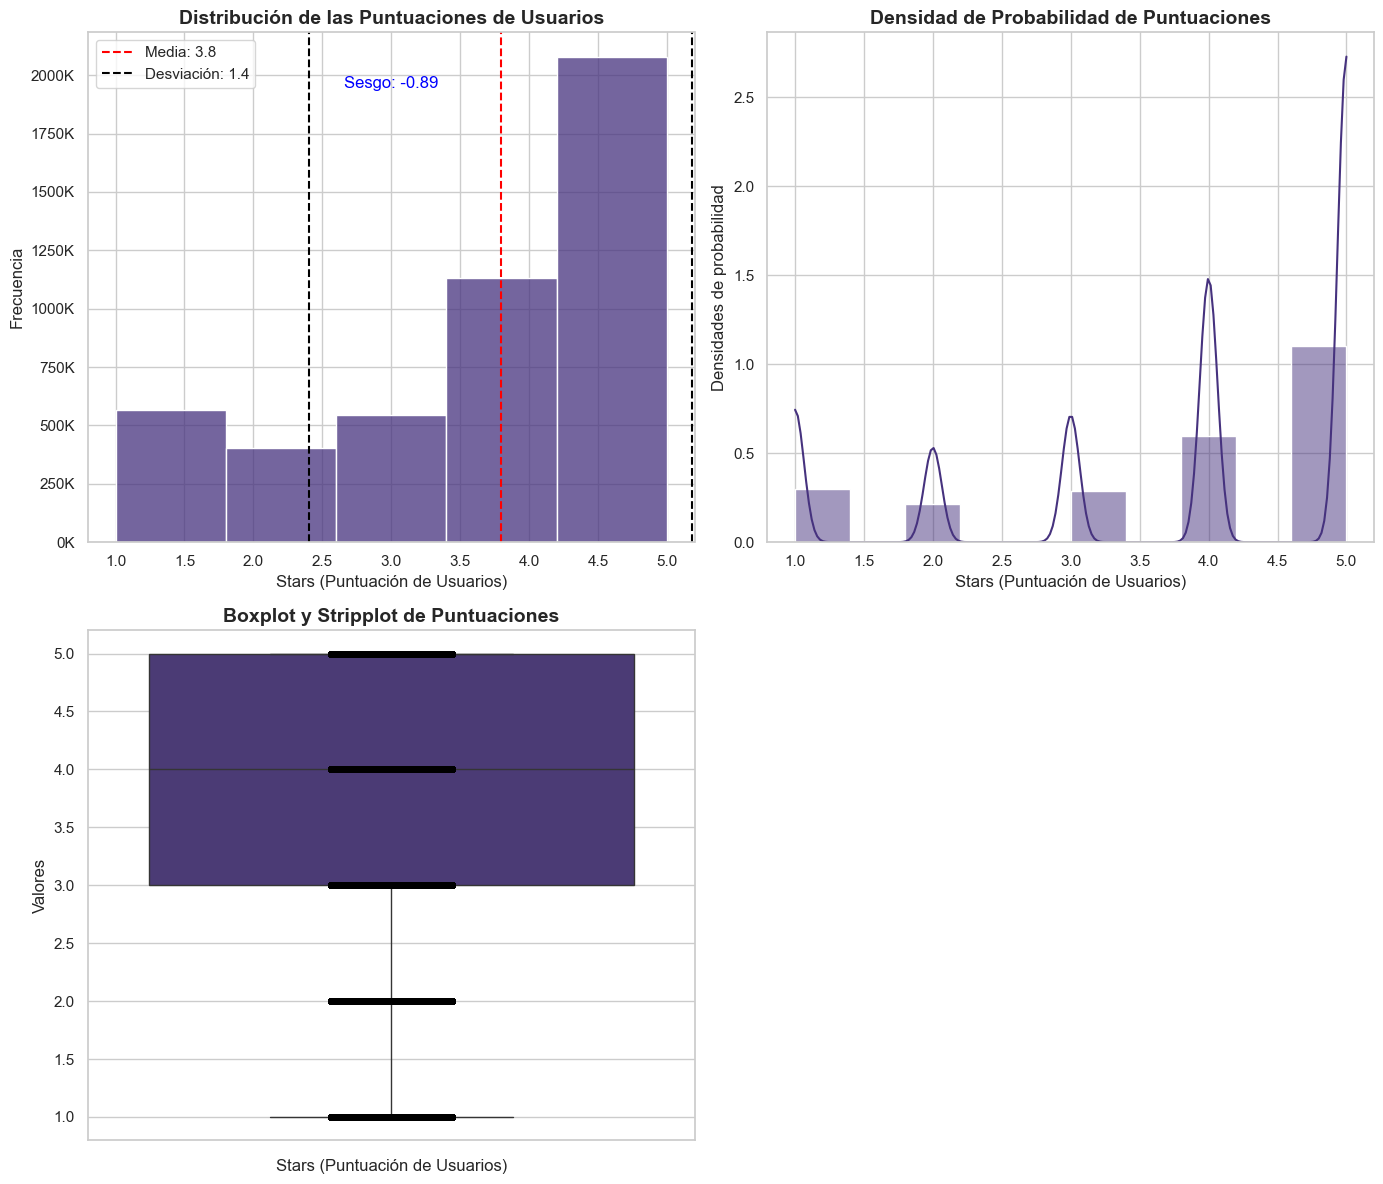

In [14]:
# Crear figura con dos filas y dos columnas de subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Primer gráfico: Histograma con líneas de media, desviación estándar y sesgo
ax1 = axes[0, 0]
sns.histplot(data=df['stars'], bins=5, ax=ax1)
ax1.set_xlabel('Stars (Puntuación de Usuarios)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de las Puntuaciones de Usuarios', fontsize=14, weight='bold')

# Calcular y dibujar media, desviación estándar y sesgo
media = df['stars'].mean()
std = df['stars'].std()
sesgo = df['stars'].skew()

# Dibujar líneas para media y desviación estándar
ax1.axvline(media, color='red', linestyle='--', label=f'Media: {media:.1f}')
ax1.axvline(media + std, color='black', linestyle='--', label=f'Desviación: {std:.1f}')
ax1.axvline(media - std, color='black', linestyle='--')

# Mostrar el sesgo en el gráfico
ax1.text(0.5, 0.9, f'Sesgo: {sesgo:.2f}', ha='center', va='center', transform=ax1.transAxes, fontsize=12, color='blue')

# Formatear el eje Y para mostrar las frecuencias en miles
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))

# Agregar leyenda
ax1.legend()

# Segundo gráfico: Histograma con densidad de probabilidad
ax2 = axes[0, 1]
sns.histplot(data=df['stars'], stat='density', kde=True, bins=10, ax=ax2)
ax2.set_xlabel('Stars (Puntuación de Usuarios)')
ax2.set_ylabel('Densidades de probabilidad')
ax2.set_title('Densidad de Probabilidad de Puntuaciones', fontsize=14, weight='bold')

# Tercer gráfico (debajo de los otros dos): Boxplot y Stripplot
ax3 = axes[1, 0]
sns.boxplot(data=df['stars'], ax=ax3)
sns.stripplot(data=df['stars'], ax=ax3, color='black', jitter=True)
ax3.set_xlabel('Stars (Puntuación de Usuarios)')
ax3.set_ylabel('Valores')
ax3.set_title('Boxplot y Stripplot de Puntuaciones', fontsize=14, weight='bold')

# Eliminar el gráfico vacío en el cuarto cuadro
axes[1, 1].axis('off')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### Observaciones:

1. **Predominancia de puntuaciones altas**:
   - Las puntuaciones de **5 estrellas** son las más frecuentes, representando el **44%** de las reseñas, seguidas por las **4 estrellas** con el **23.9%**. Esto sugiere una tendencia general positiva de los usuarios hacia los comercios.

2. **Menor frecuencia en puntuaciones bajas**:
   - Las puntuaciones de **1 estrella** constituyen el **12%**, mientras que las de **2 estrellas** son menos frecuentes, con solo el **8.6%**. Estas puntuaciones bajas son representativas de una porción más pequeña de las reseñas, pero aún así significativas.

3. **Sesgo hacia la izquierda** (Asimetría):
   - El histograma muestra una **asimetría negativa** o **sesgo hacia la izquierda**. Esto se debe a que las puntuaciones más altas (4 y 5 estrellas) son mucho más comunes que las puntuaciones bajas (1 y 2 estrellas). Este comportamiento es confirmado por el cálculo de la **asimetría** de los datos, que es **-0.89**. Un valor negativo de asimetría indica que la cola de la distribución se extiende hacia los valores bajos, lo que refleja que la mayoría de los usuarios tienden a calificar más positivamente.

4. **Interpretación del sesgo**:
   - Este sesgo podría ser indicativo de una tendencia general de los usuarios a otorgar calificaciones positivas, lo cual podría ser resultado de una buena calidad general de los comercios evaluados. Además, los usuarios insatisfechos (que otorgan 1 o 2 estrellas) podrían no estar tan inclinados a dejar reseñas comparado con los usuarios satisfechos.

### Conclusión:
El histograma revela que la mayoría de las puntuaciones son altas (principalmente 4 y 5 estrellas), mientras que las bajas puntuaciones son menos comunes. La **asimetría negativa** refuerza la idea de que los usuarios tienden a ser más generosos en sus evaluaciones. Este patrón podría ser útil para identificar comercios con una calificación global positiva, aunque un análisis más profundo de los comentarios y un análisis de sentimiento serían necesarios para comprender las razones detrás de las puntuaciones bajas. No se observan `Outliers`.

### Variables Categóricas

In [15]:
# Se identifican las Variables Categóricas
df.select_dtypes(include='object').columns

Index(['review_id', 'user_id', 'business_id', 'text', 'name', 'state'], dtype='object')

In [16]:
# Observar las Variables Categóricas, se excluyen las numéricas y de Tiempo
df.describe(exclude=['number', 'datetime'])

,review_id,user_id,business_id,text,name,state
count,4724471,4724471,4724471,4724471,4724471,4724471
unique,4724471,1445990,52268,4713867,36732,19
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,_ab50qdWOk0DdB6XOrBitw,"At the height of the Omicron surge, Wendy's DO...",McDonald's,PA
freq,1,1704,7673,10,18210,1100250


In [17]:
# Filtrar para ver comentario en varios registros
filtro_text = df[df['text'].str.contains("At the height of the Omicron surge, Wendy's DO", na=False)]
filtro_text.head()

,review_id,user_id,business_id,stars,text,date,name,state
414590,zHnCoIy7h2f9-HQ_WEKpzA,qHZWwTeGdl66NhFHXntZ2Q,Jx8vvRXwfCjkiaofXuNe8g,1,"At the height of the Omicron surge, Wendy's DO...",2022-01-14 06:15:22,Wendy's,AZ
423870,FOmrYE8R4BaiSQi8QWuy5Q,qHZWwTeGdl66NhFHXntZ2Q,L5LW_wN6Z0JV_vKe2jnsBw,1,"At the height of the Omicron surge, Wendy's DO...",2022-01-14 06:16:25,Wendy's,AZ
428803,I9lIGp6JjMUDzsM_xMRghA,qHZWwTeGdl66NhFHXntZ2Q,iNMdSi5bmvGSGeRQiUW4dw,1,"At the height of the Omicron surge, Wendy's DO...",2022-01-14 06:14:22,Wendy's,AZ
428805,FLs8R5R3wJZCZ5pTzFmf_A,qHZWwTeGdl66NhFHXntZ2Q,nUfx921sp44DDiZWa1P3wQ,1,"At the height of the Omicron surge, Wendy's DO...",2022-01-14 06:10:56,Wendy's,AZ
1784396,Rua6Xv165Z_MFi2OOJF7fw,qHZWwTeGdl66NhFHXntZ2Q,pHmbBluyF1yHMTEAy3fChw,1,"At the height of the Omicron surge, Wendy's DO...",2022-01-14 06:12:46,Wendy's,AZ


In [18]:
# Mostrar los Comentarios para ver si son los mismos
print(filtro_text['text'].iloc[:])

414590     At the height of the Omicron surge, Wendy's DO...
423870     At the height of the Omicron surge, Wendy's DO...
428803     At the height of the Omicron surge, Wendy's DO...
428805     At the height of the Omicron surge, Wendy's DO...
1784396    At the height of the Omicron surge, Wendy's DO...
1871356    At the height of the Omicron surge, Wendy's DO...
2333186    At the height of the Omicron surge, Wendy's DO...
3269094    At the height of the Omicron surge, Wendy's DO...
3772701    At the height of the Omicron surge, Wendy's DO...
4230965    At the height of the Omicron surge, Wendy's DO...
Name: text, dtype: object


In [19]:
# Identificar los usuarios únicos que realizaron los comentarios
usuarios_unicos = filtro_text["user_id"].unique()
print(f'Usuarios únicos que realizaron los comentarios: {usuarios_unicos}')

# Identificar la fecha más antigua de los comentarios
fecha_minima = filtro_text['date'].min()
print(f'Primera fecha registrada de comentarios: {fecha_minima}')

# Identificar la fecha más reciente de los comentarios
fecha_maxima = filtro_text['date'].max()
print(f'Última fecha registrada de comentarios: {fecha_maxima}')


Usuarios únicos que realizaron los comentarios: ['qHZWwTeGdl66NhFHXntZ2Q']
Primera fecha registrada de comentarios: 2022-01-14 06:08:01
Última fecha registrada de comentarios: 2022-01-14 06:16:25


#### Observaciones

- Las variables categóricas más relevantes en el análisis son: `review_id`, `user_id`, `business_id`, `text`, `name` y `state`. Estas variables proporcionan información clave sobre las reseñas, los usuarios, los negocios y su localización.

- En la columna `state`, el valor más frecuente es **"PA" (Pensilvania)**, con un total de **1,100,250 ocurrencias**, lo que indica que este estado tiene una alta representación en el conjunto de datos.

- La columna `text`, que contiene los comentarios de los usuarios, presenta un alto número de valores únicos, lo cual es esperado debido a la naturaleza personalizada de cada reseña.

- La variable `review_id` tiene valores únicos para cada entrada, lo que confirma que no existen comentarios duplicados en este conjunto de datos.

- En la columna `name`, el comercio más frecuentemente reseñado es **McDonald's**, con **18,210 apariciones**. Este dato sugiere que los locales de comida rápida generan un volumen significativo de comentarios, probablemente debido a su popularidad y a su amplia presencia geográfica.

- En la variable `text`, se observa que un Usuario repite el comentario 10 veces en distintos `business_id` de una misma franquicia(Wendy's) en un periodo de tiempo de 8 minutos de diferencia, perteneciendo todos los `business_id` al Estado de Arizona(AZ).

- En conjunto, este análisis destaca patrones importantes que pueden ser utilizados para explorar tendencias y realizar análisis adicionales sobre la interacción entre clientes y negocios.

In [20]:
# Contar las ocurrencias de cada 'name'
comercios = df['name'].value_counts()

# Calcular el porcentaje de cada comercio
porcentaje_comercios = df['name'].value_counts(normalize=True) * 100

# Crear el DataFrame con 'name' como índice
df_comercios = pd.DataFrame({
    'Frecuencia': comercios,
    'Porcentaje (%)': porcentaje_comercios.round(2)
})

# Calcular la frecuencia acumulada
df_comercios['Frecuencia Acumulada'] = df_comercios['Frecuencia'].cumsum()

# Calcular el porcentaje acumulado
df_comercios['Porcentaje Acumulado (%)'] = df_comercios['Porcentaje (%)'].cumsum()

# Resetear el índice para que 'name' sea una columna
df_comercios = df_comercios.reset_index()
df_comercios.columns = ['name', 'Frecuencia', 'Porcentaje (%)', 'Frecuencia Acumulada', 'Porcentaje Acumulado (%)']

# Imprimir el número de nombres de comercios únicos
print(f'Cantidad de Nombres de Comercios: {df["name"].nunique()}')

# Mostrar los primeros 15 valores
df_comercios.head(10)


Cantidad de Nombres de Comercios: 36732


,name,Frecuencia,Porcentaje (%),Frecuencia Acumulada,Porcentaje Acumulado (%)
0,McDonald's,18210,0.39,18210,0.39
1,Chipotle Mexican Grill,9763,0.21,27973,0.60
2,First Watch,9317,0.20,37290,0.80
3,Taco Bell,8636,0.18,45926,0.98
4,Acme Oyster House,8491,0.18,54417,1.16
5,Chick-fil-A,8378,0.18,62795,1.34
6,Panera Bread,7565,0.16,70360,1.50
7,Oceana Grill,7516,0.16,77876,1.66
8,Buffalo Wild Wings,7347,0.16,85223,1.82
9,Chili's,6565,0.14,91788,1.96


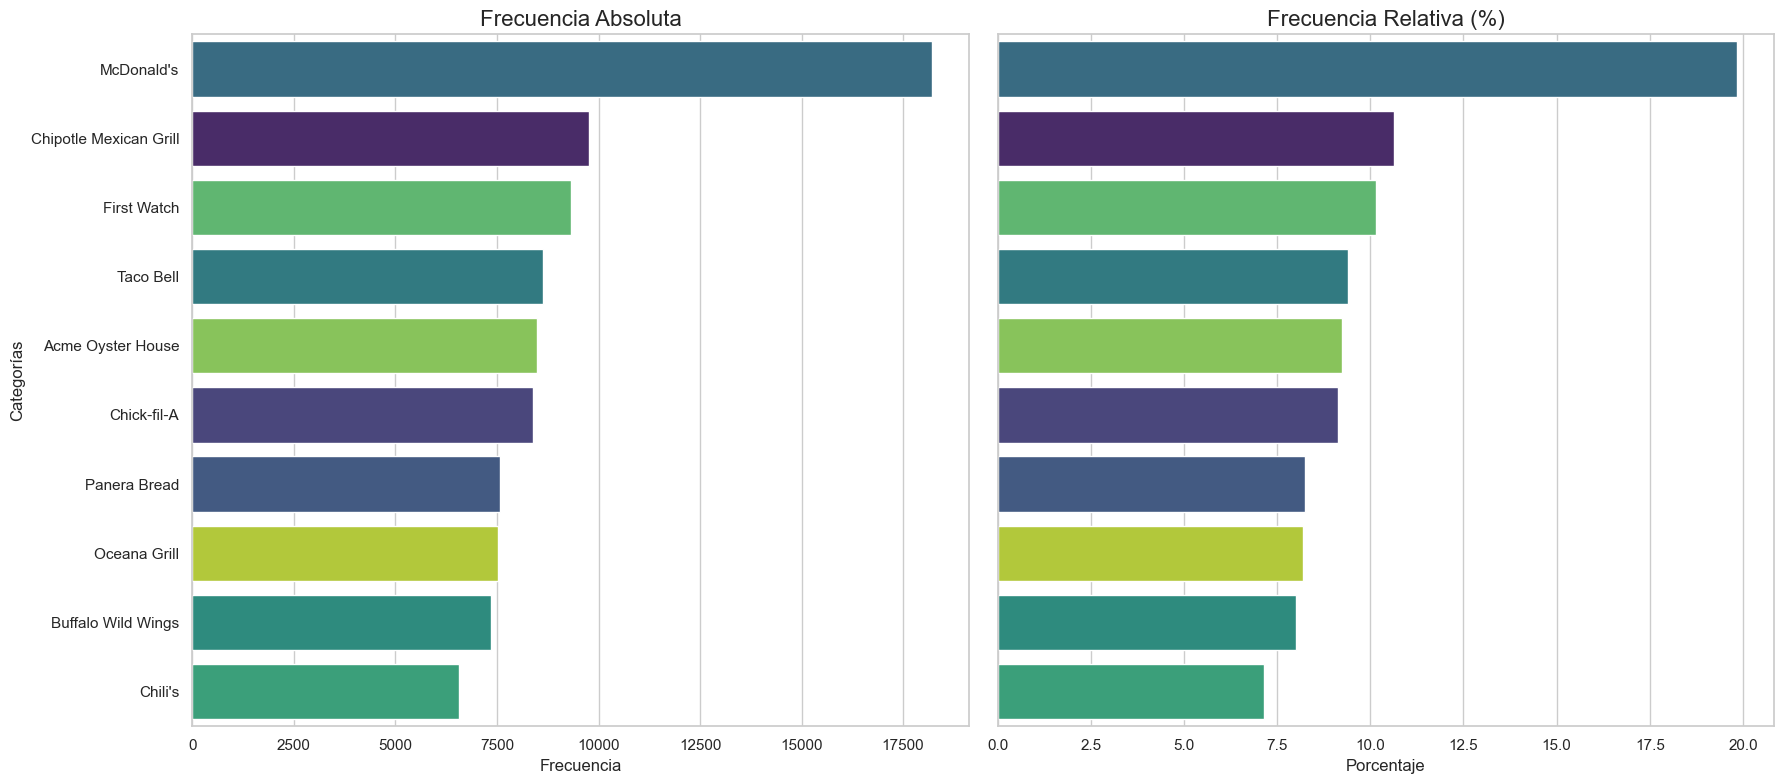

In [21]:
# Agrupar y obtener las 10 categorías más frecuentes
top_10_names = df['name'].value_counts().head(10)

# Filtrar el DataFrame para incluir solo las 10 categorías
filtered_df = df[df['name'].isin(top_10_names.index)]

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Primer gráfico: Frecuencia absoluta
sns.countplot(
    data=filtered_df, 
    y='name',
    hue='name', 
    order=top_10_names.index, 
    ax=axes[0], 
    palette='viridis'
)
axes[0].set_title('Frecuencia Absoluta')
axes[0].set_xlabel('Frecuencia')
axes[0].set_ylabel('Categorías')

# Segundo gráfico: Frecuencia relativa (porcentaje)
sns.countplot(
    data=filtered_df, 
    y='name',
    hue='name', 
    order=top_10_names.index, 
    ax=axes[1], 
    stat='percent', 
    palette='viridis'
)
axes[1].set_title('Frecuencia Relativa (%)')
axes[1].set_xlabel('Porcentaje')
axes[1].set_ylabel('')  # Sin etiqueta para evitar redundancia

# Ajustar espaciado y mostrar gráfico
plt.tight_layout()
plt.show()


#### **Resumen General**
- **Cantidad total de nombres únicos de comercios:** **36,732**  
- **Cantidad total de registros en el dataset:** **4,724,471**  
- **Porcentaje promedio por comercio:** Alrededor del **0.0027%** (cada nombre contribuye muy poco en promedio al total de registros).

**Concentración de frecuencias**
1. El comercio más frecuente, **McDonald's**, tiene **18,210 ocurrencias**, representando el **0.39%** del total de registros.  
2. Las siguientes posiciones (como **Chipotle Mexican Grill** y **First Watch**) muestran una caída significativa en frecuencia, con un promedio del **0.20%**.  
3. Juntos, los 10 nombres más frecuentes suman **91,788 ocurrencias**, lo que equivale al **1.96%** del total del dataset.

**Distribución acumulada**
- La distribución muestra que **el 98.04% de los registros pertenecen a nombres fuera del Top 10**.  
- Esto sugiere una **alta diversidad en los datos**, con una mayoría de nombres únicos o poco frecuentes.

**Diversidad**
- **Nombres únicos:** Con 36,732 nombres distintos, el dataset cubre una amplia gama de comercios, desde grandes cadenas hasta negocios locales.  
- La **frecuencia promedio** por nombre es de aproximadamente **128 registros por comercio**, aunque esta cifra está sesgada por los nombres más frecuentes.

 **Implicaciones**
- **McDonald's** lidera claramente, lo que refleja su posición como una cadena internacional con una alta presencia en los datos.  
- La caída rápida en frecuencias sugiere que después de las grandes cadenas, la base de datos incluye una amplia variedad de comercios menos conocidos.

**Conclusión**
- El análisis de los nombres de comercios resalta una notable concentración de frecuencias en cadenas conocidas como **McDonald's** y **Taco Bell**, mientras que el resto del dataset se distribuye entre una gran diversidad de nombres. Este patrón es común en bases de datos de este tipo, donde las grandes marcas tienen una fuerte presencia, pero una proporción significativa del mercado se encuentra en pequeños negocios o nombres únicos. 


In [22]:
# Contar las ocurrencias de cada 'state'
estados = df['state'].value_counts()

# Calcular el porcentaje de cada comercio
porcentaje_estados = df['state'].value_counts(normalize=True) * 100

# Crear el DataFrame con 'state' como índice
df_estados = pd.DataFrame({
    'Frecuencia': estados,
    'Porcentaje (%)': porcentaje_estados.round(2)
})

# Calcular la frecuencia acumulada
df_estados['Frecuencia Acumulada'] = df_estados['Frecuencia'].cumsum()

# Calcular el porcentaje acumulado
df_estados['Porcentaje Acumulado (%)'] = df_estados['Porcentaje (%)'].cumsum()

# Resetear el índice para que 'state' sea una columna
df_estados = df_estados.reset_index()
df_estados.columns = ['state', 'Frecuencia', 'Porcentaje (%)', 'Frecuencia Acumulada', 'Porcentaje Acumulado (%)']

# Imprimir el número de nombres de estados únicos
print(f'Cantidad de Estados: {df["state"].nunique()}')

# Mostrar los primeros 15 valores
df_estados.head(10)


Cantidad de Estados: 19


,state,Frecuencia,Porcentaje (%),Frecuencia Acumulada,Porcentaje Acumulado (%)
0,PA,1100250,23.29,1100250,23.29
1,FL,792133,16.77,1892383,40.06
2,LA,558340,11.82,2450723,51.88
3,TN,434697,9.20,2885420,61.08
4,MO,354605,7.51,3240025,68.59
5,IN,335843,7.11,3575868,75.70
6,AZ,267036,5.65,3842904,81.35
7,NV,243594,5.16,4086498,86.51
8,CA,211748,4.48,4298246,90.99
9,NJ,171186,3.62,4469432,94.61


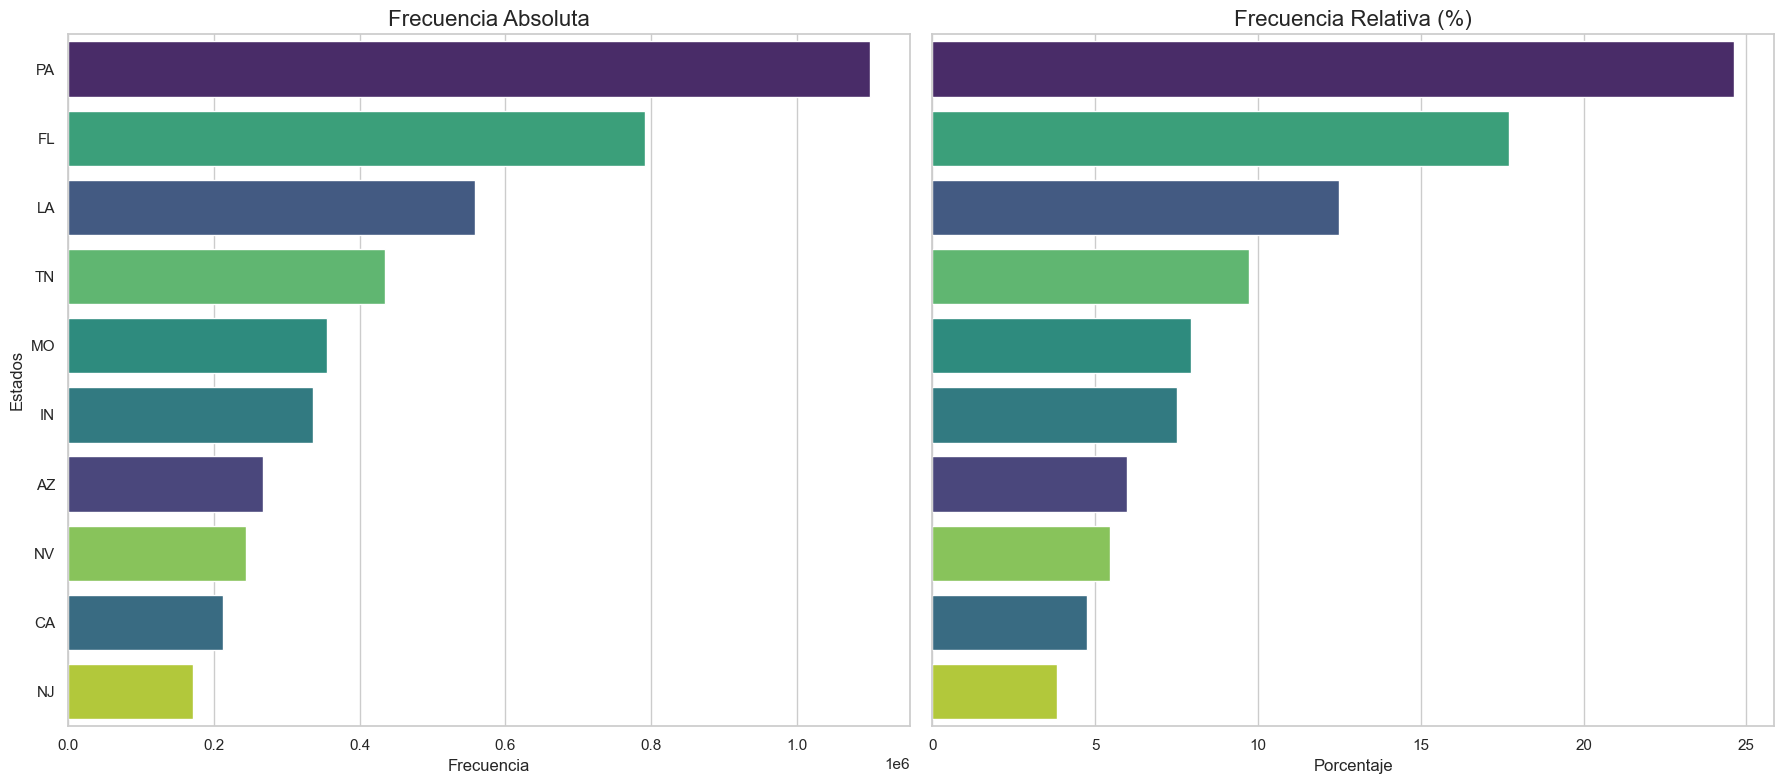

In [23]:
# Agrupar y obtener las 10 categorías más frecuentes
top_10_states = df['state'].value_counts().head(10)

# Filtrar el DataFrame para incluir solo las 10 categorías
filtered_df = df[df['state'].isin(top_10_states.index)]

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Primer gráfico: Frecuencia absoluta
sns.countplot(
    data=filtered_df, 
    y='state',
    hue='state', 
    order=top_10_states.index, 
    ax=axes[0], 
    palette='viridis'
)
axes[0].set_title('Frecuencia Absoluta')
axes[0].set_xlabel('Frecuencia')
axes[0].set_ylabel('Estados')

# Segundo gráfico: Frecuencia relativa (porcentaje)
sns.countplot(
    data=filtered_df, 
    y='state',
    hue='state', 
    order=top_10_states.index, 
    ax=axes[1], 
    stat='percent', 
    palette='viridis'
)
axes[1].set_title('Frecuencia Relativa (%)')
axes[1].set_xlabel('Porcentaje')
axes[1].set_ylabel('')  # Sin etiqueta para evitar redundancia

# Ajustar espaciado y mostrar gráfico
plt.tight_layout()
plt.show()


#### **Resumen General**
- **Cantidad total de estados únicos:** **19**  
- **Cantidad total de registros en el dataset:** **4,724,471**  
- **Estado más frecuente:** **PA (Pensilvania)** con **1,100,250 registros** (**23.29% del total**).  
- **Estado menos frecuente en el Top 10:** **NJ (Nueva Jersey)** con **171,186 registros** (**3.62% del total**).  

**Concentración de registros por estado**
1. **PA (Pensilvania)** lidera en registros con **1,100,250** entradas, representando más del **23% del total**.  
2. Los tres estados más frecuentes (**PA, FL y LA**) acumulan juntos el **51.88% de los registros**, lo que indica una concentración significativa en ciertas regiones.  
3. Los siguientes estados tienen frecuencias significativamente más bajas, con **MO (7.51%)** y **NJ (3.62%)** cerrando el Top 10.

**Distribución acumulada**
- El **90.99% de los registros** están cubiertos por los 10 estados más frecuentes, lo que muestra que la mayoría de los datos se concentran en estos estados.  
- Solo el **9.01% restante** está distribuido entre los 9 estados menos frecuentes fuera del Top 10.

**Análisis regional**
- **Altamente representados:** PA y FL reflejan áreas con una alta concentración de negocios o clientes relacionados con el dataset.
- **Menos representados:** Estados como NV y CA tienen menos registros, lo que podría estar relacionado con limitaciones geográficas o de cobertura.

**Conclusión**
**PA y FL como líderes:** Estos estados reflejan la mayor actividad dentro del dataset, probablemente debido a su densidad poblacional o a una alta cobertura de comercios.  
**Diversidad regional:** Aunque la mayoría de los registros están concentrados en unos pocos estados, la presencia de 19 estados muestra una representación diversa a nivel nacional.  


## Análisis Bivariado

In [24]:
# Filtrar los 10 nombres más frecuentes
top_10_names = df['name'].value_counts().head(10).index

# Filtrar el DataFrame solo con esos 10 nombres
df_top_10 = df[df['name'].isin(top_10_names)]

# Crear la tabla de contingencia solo con esos 10 nombres
tabla_contingencia = pd.crosstab(df_top_10['stars'], df_top_10['name'], normalize='columns').round(2)

# Mostrar la tabla de contingencia
tabla_contingencia


name,Acme Oyster House,Buffalo Wild Wings,Chick-fil-A,Chili's,Chipotle Mexican Grill,First Watch,McDonald's,Oceana Grill,Panera Bread,Taco Bell
stars,,,,,,,,,,
1,0.04,0.43,0.23,0.41,0.42,0.09,0.68,0.05,0.32,0.59
2,0.06,0.18,0.10,0.15,0.15,0.08,0.10,0.06,0.18,0.10
3,0.13,0.14,0.09,0.13,0.11,0.10,0.07,0.10,0.15,0.08
4,0.31,0.13,0.15,0.15,0.14,0.24,0.06,0.25,0.19,0.08
5,0.47,0.12,0.41,0.16,0.17,0.49,0.09,0.53,0.16,0.14


#### **Tabla de contingencia normalizada por columnas (`normalize='columns'`)**

Esta tabla muestra la **distribución de las calificaciones (estrellas) por cada nombre de establecimiento**, es decir, cómo se distribuyen las proporciones de las calificaciones (1 a 5 estrellas) para cada establecimiento en relación con el total de calificaciones que ese establecimiento ha recibido.

#### Observaciones:
- **Establecimientos con calificaciones altas**: 
  - **McDonald's** tiene una alta proporción de calificaciones de 1 estrella (0.68), lo que indica una gran cantidad de reseñas negativas en comparación con otros establecimientos. Sin embargo, también tiene una proporción considerable de 5 estrellas (0.09), lo que sugiere que tiene una buena cantidad de reseñas muy positivas, pero las reseñas negativas son mucho más frecuentes.
  - **First Watch** y **Oceana Grill** también tienen una proporción significativa de reseñas de 5 estrellas (0.49 y 0.53, respectivamente), indicando una recepción mayoritariamente positiva, aunque con algo de diversidad en las opiniones.
  
- **Establecimientos con calificaciones equilibradas**: 
  - **Acme Oyster House** muestra una distribución más equilibrada con un 47% de 5 estrellas, lo que sugiere una satisfacción relativamente alta en general, pero sin ser extrema.
  - **Buffalo Wild Wings** y **Chili's** tienen una mayor proporción de 1 estrella (0.43 y 0.41), lo que podría indicar que tienen más reseñas negativas comparado con otras categorías.

- **Establecimientos con menos reseñas negativas**:
  - **Chipotle Mexican Grill** y **Chick-fil-A** tienen proporciones de reseñas de 1 estrella más moderadas (0.42 y 0.23), con una distribución más uniforme en las calificaciones altas (4 y 5 estrellas).

#### Implicaciones:
- **Revisión de la satisfacción del cliente**: Las reseñas de 1 estrella pueden indicar áreas de mejora para algunos establecimientos, especialmente para McDonald's. Por el contrario, los establecimientos como First Watch o Oceana Grill parecen tener una mayor satisfacción en general.
- **Necesidad de acciones correctivas**: Los establecimientos con alta proporción de 1 estrella (por ejemplo, McDonald's) podrían necesitar realizar cambios en su servicio o producto para mejorar la satisfacción del cliente.



In [25]:
# Filtrar los 10 nombres más frecuentes
top_10_names = df['name'].value_counts().head(10).index

# Filtrar el DataFrame solo con esos 10 nombres
df_top_10 = df[df['name'].isin(top_10_names)]

# Crear la tabla de contingencia solo con esos 10 nombres
tabla_contingencia_index = pd.crosstab(df_top_10['stars'], df_top_10['name'], normalize='index').round(2)
tabla_contingencia_index

name,Acme Oyster House,Buffalo Wild Wings,Chick-fil-A,Chili's,Chipotle Mexican Grill,First Watch,McDonald's,Oceana Grill,Panera Bread,Taco Bell
stars,,,,,,,,,,
1,0.01,0.10,0.06,0.08,0.12,0.02,0.37,0.01,0.07,0.15
2,0.05,0.12,0.08,0.10,0.14,0.07,0.18,0.04,0.13,0.08
3,0.11,0.10,0.08,0.09,0.11,0.10,0.13,0.08,0.12,0.07
4,0.18,0.06,0.09,0.07,0.10,0.15,0.08,0.13,0.10,0.05
5,0.17,0.04,0.15,0.04,0.07,0.19,0.07,0.17,0.05,0.05


#### **Tabla de contingencia normalizada por índices (`normalize='index'`)**

Esta tabla muestra la **distribución de las calificaciones para cada establecimiento** con respecto a su total de reseñas, es decir, cómo se distribuyen las estrellas (1 a 5) en cada establecimiento de acuerdo con sus propias reseñas.

#### Observaciones:
- **Distribución de calificaciones bajas (1 y 2 estrellas)**:
  - **McDonald's** tiene una proporción significativa de 1 estrella (0.37) entre sus reseñas, lo que confirma que las reseñas negativas son más frecuentes en comparación con las positivas. Sin embargo, esto también implica que el establecimiento podría tener un gran volumen de reseñas, lo que lleva a una mayor posibilidad de recibir opiniones más extremas.
  - **Buffalo Wild Wings** también tiene una proporción considerable de 1 estrella (0.10), lo que puede indicar una cierta insatisfacción.
  
- **Distribución de calificaciones altas (4 y 5 estrellas)**:
  - **First Watch** y **Oceana Grill** presentan un porcentaje relativamente alto de 5 estrellas en comparación con otras calificaciones (0.19 y 0.17, respectivamente), lo que indica que muchos clientes están altamente satisfechos con estos establecimientos.
  - **Chick-fil-A** tiene una proporción significativa de 5 estrellas (0.15), lo que también sugiere una buena recepción por parte de los clientes.

- **Establecimientos con proporciones bajas de calificaciones bajas**:
  - **Acme Oyster House** tiene un porcentaje de 1 estrella bajo (0.01), lo que indica que, aunque sus reseñas pueden ser en su mayoría positivas, los pocos comentarios negativos que tiene son muy bajos en comparación con las demás calificaciones.
  
#### Implicaciones:
- **Establecimientos con una alta proporción de 1 estrella**: McDonald's y Buffalo Wild Wings parecen tener una mayor frecuencia de reseñas negativas, lo que sugiere que podrían necesitar mejorar ciertos aspectos de su servicio o producto.
- **Establecimientos con una alta proporción de 5 estrellas**: Los establecimientos como First Watch y Oceana Grill muestran una mayor satisfacción, lo que podría ser un buen indicativo de calidad y servicio al cliente.
- **Comparación entre establecimientos**: Al observar la proporción de cada calificación, se pueden identificar patrones en la satisfacción del cliente que podrían requerir atención o reconocimiento. 


### Conclusión general:
Las observaciones hechas a partir de ambas tablas sugieren que **McDonald's** y **Buffalo Wild Wings** tienen una mayor cantidad de calificaciones negativas en comparación con otros establecimientos, mientras que **First Watch** y **Oceana Grill** reciben más calificaciones positivas. Estos resultados pueden ser útiles para los responsables de la gestión de estas marcas, ya que ofrecen una visión más clara sobre cómo mejorar la experiencia del cliente, qué áreas necesitan atención y qué marcas están obteniendo el mayor nivel de satisfacción.

In [26]:
# Filtrar los 10 nombres más frecuentes
top_10_states = df['state'].value_counts().head(10).index

# Filtrar el DataFrame solo con esos 10 nombres
df_top_10 = df[df['state'].isin(top_10_states)]

# Crear la tabla de contingencia solo con esos 10 nombres
tabla_contingencia = pd.crosstab(df_top_10['stars'], df_top_10['state'], normalize='columns').round(2)

# Mostrar la tabla de contingencia
tabla_contingencia

state,AZ,CA,FL,IN,LA,MO,NJ,NV,PA,TN
stars,,,,,,,,,,
1,0.14,0.10,0.13,0.11,0.10,0.12,0.15,0.14,0.12,0.12
2,0.09,0.08,0.08,0.08,0.08,0.09,0.10,0.09,0.09,0.08
3,0.11,0.10,0.10,0.11,0.11,0.12,0.12,0.10,0.13,0.11
4,0.23,0.22,0.22,0.25,0.24,0.25,0.23,0.22,0.26,0.23
5,0.43,0.50,0.47,0.44,0.47,0.43,0.41,0.45,0.40,0.46


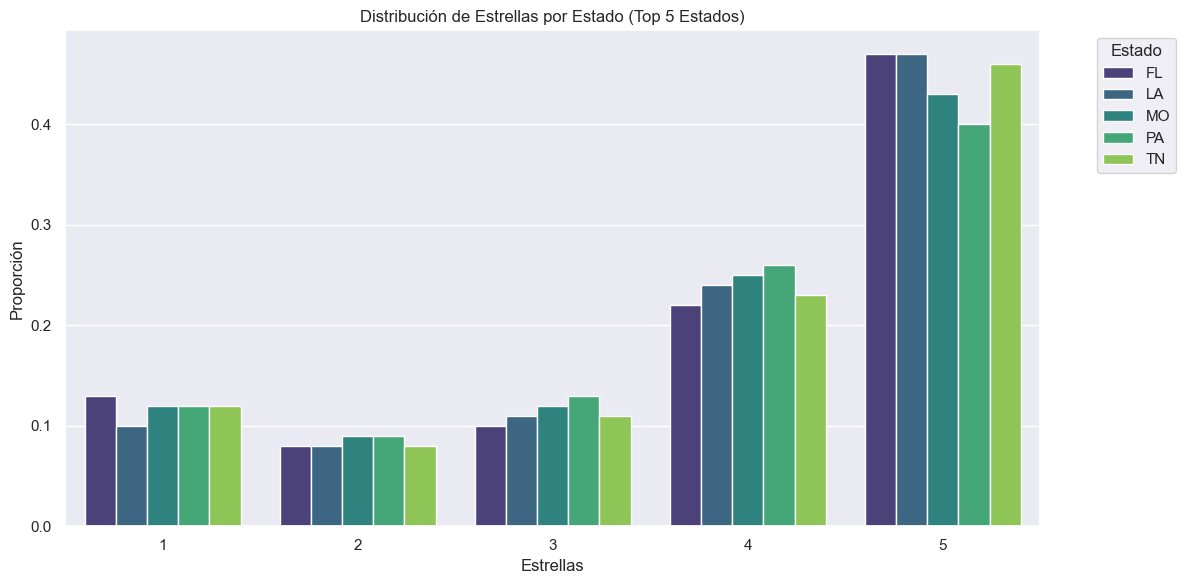

In [54]:
# Asegúrate de que el dataframe ya esté filtrado según los 5 estados más frecuentes
top_5_states = df['state'].value_counts().head(5).index

# Filtrar el DataFrame solo con esos 5 estados
df_top_5 = df[df['state'].isin(top_5_states)]

# Crear la tabla de contingencia solo con esos 5 estados
tabla_contingencia = pd.crosstab(df_top_5['stars'], df_top_5['state'], normalize='columns').round(2)

# Convertir la tabla de contingencia en un formato largo para facilitar el gráfico
tabla_larga = tabla_contingencia.reset_index().melt(id_vars='stars', var_name='state', value_name='proporción')

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(x='stars', y='proporción', hue='state', data=tabla_larga, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Estrellas por Estado (Top 5 Estados)')
plt.xlabel('Estrellas')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño
plt.tight_layout()
plt.show()



#### **Distribución General de Calificaciones:**

- **Calificaciones de 5 estrellas (la mayor satisfacción)**: 
  - Los estados con la mayor proporción de calificaciones de 5 estrellas son **California (CA)**, **Florida (FL)**, **Louisiana (LA)** y **Tennessee (TN)**. Estos estados tienen porcentajes entre el 44% y el 50%, lo que indica una satisfacción destacada entre los clientes en estos estados.
  
- **Calificaciones de 1 estrella (la menor satisfacción)**:
  - Los estados con la mayor proporción de calificaciones de 1 estrella son **New Jersey (NJ)** (0.15) y **Arizona (AZ)** (0.14). Aunque el porcentaje de 1 estrella es relativamente bajo en comparación con las calificaciones de 5 estrellas, la proporción en estos estados aún es significativa y sugiere que hay clientes insatisfechos que podrían estar enfrentando problemas con el servicio o productos.

#### **Otros Detalles Relevantes:**

- **Proporción media de calificaciones de 3 estrellas**: 
  - La mayoría de los estados tienen una proporción cercana o ligeramente superior al 10% de calificaciones de 3 estrellas, lo que sugiere que una parte significativa de los clientes siente que la experiencia fue "promedio" o "aceptable".
  
- **Distribución equilibrada de calificaciones de 4 estrellas**: 
  - Todos los estados tienen proporciones bastante similares de calificaciones de 4 estrellas, con una media que se sitúa en torno al 22% al 26%. Esto sugiere que una buena parte de los clientes está satisfecha, pero no al nivel más alto de satisfacción.

### **Análisis Comparativo de los Estados:**

- **California (CA)**: 
  - Con un 50% de calificaciones de 5 estrellas, **California** tiene el mayor porcentaje de calificaciones máximas. Es un estado que parece estar destacándose en términos de satisfacción de los clientes.
  
- **Tennessee (TN)** y **Louisiana (LA)**: 
  - Estos estados tienen una proporción similar de calificaciones de 5 estrellas (alrededor de 47%), lo que indica una satisfacción elevada, aunque no tanto como California.

- **New Jersey (NJ)**:
  - Aunque tiene un 41% de calificaciones de 5 estrellas (una proporción considerable), también presenta el porcentaje más alto de calificaciones de 1 estrella (0.15). Esto puede indicar que, aunque muchos clientes están satisfechos, también existen áreas problemáticas que deben ser abordadas.

- **Florida (FL)** y **Missouri (MO)**:
  - Estos estados también muestran una proporción alta de calificaciones de 5 estrellas, alrededor del 47% y 43%, respectivamente, lo que sugiere una satisfacción bastante buena, aunque no tan destacada como en California.

#### **Conclusiones:**

- **Satisfacción alta en ciertos estados**: Los estados como **California**, **Florida**, **Tennessee**, y **Louisiana** tienen una alta proporción de calificaciones de 5 estrellas, lo que indica que la mayoría de los clientes están satisfechos en estos estados. Sin embargo, es necesario monitorear también las proporciones de 1 estrella, como en **New Jersey**.

- **Áreas de mejora**: En **New Jersey**, a pesar de tener un 41% de calificaciones de 5 estrellas, el porcentaje más alto de calificaciones de 1 estrella sugiere que ciertos aspectos del servicio o producto podrían necesitar mejoras significativas. Sería útil investigar las causas subyacentes de esta insatisfacción.

- **Proporciones equilibradas**: Otros estados como **Missouri** y **Pennsylvania** presentan una distribución más equilibrada de calificaciones de 4 estrellas, lo que indica que los clientes tienen una experiencia generalmente buena pero con margen de mejora para llegar a una mayor satisfacción.



## Análisis Temporal  

In [28]:
# Fecha Maxima y Minima del Dataset
print(f'Fecha minima: {df["date"].min()}')
print(f'Fecha maxima: {df["date"].max()}')

Fecha minima: 2005-02-16 03:23:22
Fecha maxima: 2022-01-19 19:48:25


#### Observaciones
- El Dataset cuenta con datos desde el Febrero del Año `2005` hasta el Año `2022`. Un periodo aproximadamente de 17 años, donde se realizaron los comentarios y Tips sobre los Comercios Gastronómicos.

In [39]:
# Crear el DataFrame 
frecuencia_year = df['date'].dt.year
frecuencia_mes = df['date'].dt.month
frecuencia_stars = df['stars']
df_tiempo = pd.DataFrame({
    'Year': frecuencia_year,
    'Month': frecuencia_mes,
    'Stars': frecuencia_stars
})

# Agrupar datos por Year, Month y Stars
df_grouped = df_tiempo.groupby(['Year', 'Month', 'Stars']).size().reset_index(name='Count')

# Crear un índice temporal para el gráfico
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(day=1))

# Pivotear datos para crear una tabla adecuada para el gráfico
df_pivot = df_grouped.pivot(index='Date', columns='Stars', values='Count').fillna(0)



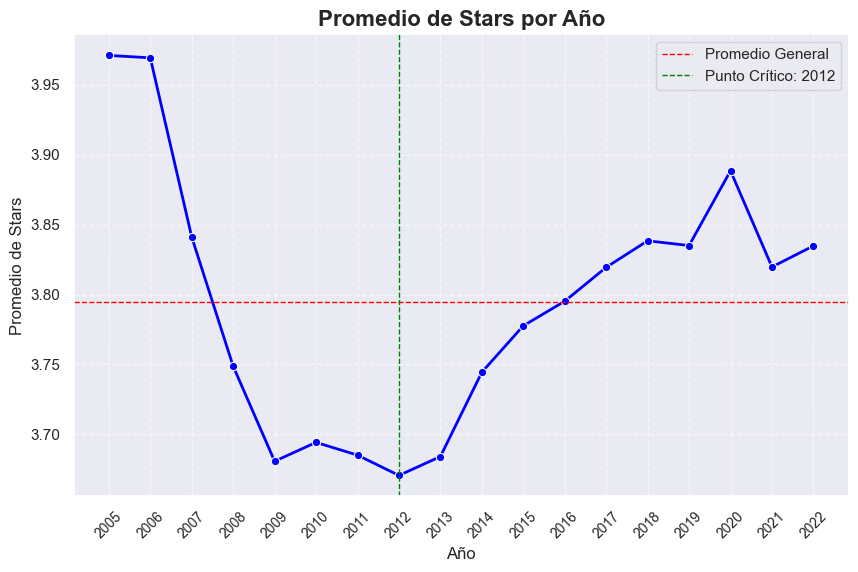

In [55]:
avg_stars_per_year['Year'] = avg_stars_per_year['Year'].astype(int)

plt.figure(figsize=(10, 6))

# Gráfico de línea con marcadores
sns.lineplot(data=avg_stars_per_year, x='Year', y='Stars', marker='o', color='blue', linestyle='-', linewidth=2)

# Título y etiquetas
plt.title('Promedio de Stars por Año', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Stars', fontsize=12)

# Cuadrícula visible
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Líneas en los ejes
plt.axhline(y=avg_stars_per_year['Stars'].mean(), color='red', linestyle='--', linewidth=1, label="Promedio General")
plt.axvline(x=2012, color='green', linestyle='--', linewidth=1, label="Punto Crítico: 2012")

# Etiquetas del eje x
plt.xticks(avg_stars_per_year['Year'], rotation=45, fontsize=10)

# Mostrar leyenda
plt.legend()

plt.show()



#### Observaciones
 **Tendencias Generales**:
  - El promedio de estrellas (`Stars`) disminuye de 2005 a 2012, alcanzando su punto más bajo en 2012 (3.670657).
  - A partir de 2013, el promedio comienza a recuperarse ligeramente, con un valor máximo en 2020 (3.888488).

 **Variación Anual**:
  - Los años 2005 y 2006 tienen un promedio similar, cerca de 3.97.
  - Entre 2007 y 2012, hay un declive constante en el promedio de calificaciones.
  - Desde 2013 hasta 2022, las calificaciones se estabilizan con una ligera tendencia al alza.
 
 **Punto de Inflexión**:
  - El año 2012 parece ser un punto crítico donde el promedio de estrellas es el más bajo, sugiriendo cambios en la calidad, satisfacción, o una posible transición en el sistema de evaluación.
 
 **Importancia del Año 2020**:
  - Durante 2020, el promedio de calificaciones es el más alto desde 2005. Este fenómeno podría estar relacionado con eventos globales (por ejemplo, cambios en los patrones de consumo durante la pandemia).


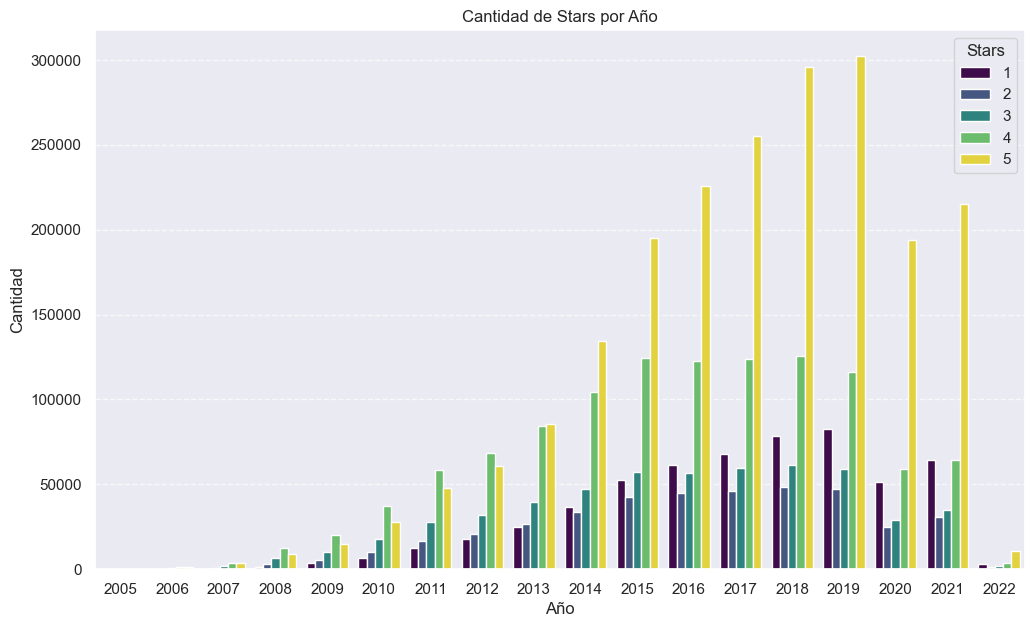

In [56]:
# Gráfico de barras agrupadas
df_grouped = df_tiempo.groupby(['Year', 'Stars']).size().reset_index(name='Count')

plt.figure(figsize=(12, 7))
sns.barplot(data=df_grouped, x='Year', y='Count', hue='Stars', palette='viridis')
plt.title('Cantidad de Stars por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Stars', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observaciones

 **Tendencia General:**

 - Se observa un aumento general en la cantidad total de calificaciones (*stars*) a lo largo de los años hasta 2019, alcanzando un máximo en las calificaciones de 5 estrellas.
 - A partir de 2020, hay una disminución significativa en todas las categorías de calificaciones, probablemente atribuible a un evento disruptivo como la pandemia de COVID-19.

 **Dominancia de Calificaciones Altas:**

 - Las calificaciones de **4 y 5 estrellas** son las más frecuentes en todos los años, con una marcada dominancia a medida que se avanza en el tiempo.
 - Las calificaciones de **5 estrellas** tienen un crecimiento más rápido que otras categorías, especialmente después de 2010.

 **Comportamiento de Calificaciones Bajas:**

 - Las calificaciones de **1 y 2 estrellas** son significativamente menores en comparación con las de mayor puntaje.
 - Aunque se incrementan levemente con el tiempo, su proporción en relación a las calificaciones altas disminuye, sugiriendo una mejora en la satisfacción o un sesgo positivo en las calificaciones.

 **Pico en 2019 y Caída Posterior:**

 - El año **2019** marca el pico en la cantidad de calificaciones, especialmente las de 5 estrellas.
 - Entre 2020 y 2022, se observa una disminución drástica en todas las categorías, lo que podría deberse a un menor número de usuarios activos o interrupciones en los servicios.

 **Diferencias en 2022:**

 - En **2022**, las calificaciones son mucho más bajas en cantidad que en años anteriores. Esto puede reflejar un cambio en la base de usuarios, un cambio en la plataforma o una reducción significativa de interacciones.

 **Creación de Segmentos Temporales:**
 
 - Los años podrían agruparse en períodos significativos:
   - **2005-2010:** Etapa de crecimiento inicial con cantidades moderadas.
   - **2011-2019:** Fase de rápido crecimiento y consolidación con un incremento constante.
   - **2020-2022:** Declive abrupto con una reducción en las interacciones.

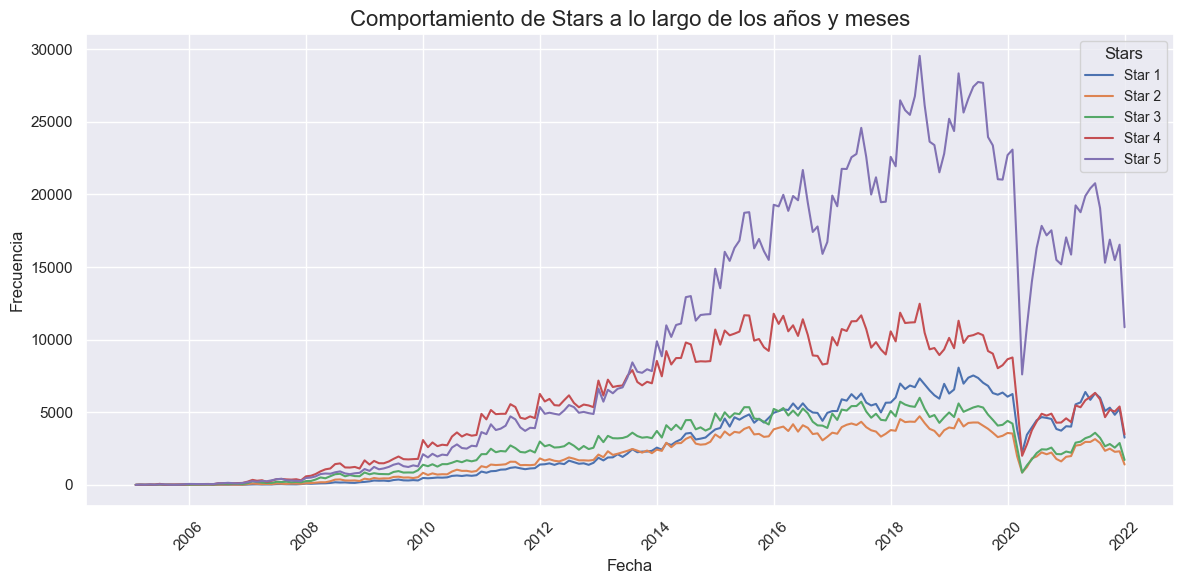

In [58]:
# Crear el gráfico con Seaborn
plt.figure(figsize=(12, 6))

# Usar sns.lineplot para trazar las series temporales
for star in df_pivot.columns:
    sns.lineplot(x=df_pivot.index, y=df_pivot[star], label=f'Star {star}')

# Personalizar el gráfico
plt.title('Comportamiento de Stars a lo largo de los años y meses', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Stars', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


#### Observación

**Estrella 1 (Puntaje Bajo)**:
- **Crecimiento Lento y Estable**: Aunque comenzó con un puntaje bajo, la **Estrella 1** mostró un crecimiento moderado, especialmente hacia 2018-2022, indicando una leve mejora en aceptación.

**Estrella 2 (Puntaje Bajo-Medio)**:
- **Crecimiento Inicial y Estabilización**: Experimentó un crecimiento en 2007-2008, con picos en 2009-2010. Después de 2010, se estabilizó y sufrió una ligera caída (2015-2018), pero recuperó algo de tracción después de 2019.

**Estrella 3 (Puntaje Medio)**:
- **Crecimiento Moderado con Picos**: Creció gradualmente, especialmente desde 2013. Mostró un incremento notable en 2016 y ganó más popularidad hacia 2017-2020.

**Estrella 4 (Puntaje Medio-Alto)**:
- **Crecimiento Sostenido y Picos Específicos**: A partir de 2008, se mantuvo en niveles altos, con picos adicionales en 2016 y 2020. Mantuvo una base sólida de usuarios y se destacó en los últimos años.

**Estrella 5 (Puntaje Alto)**:
- **Crecimiento Rápido y Sostenido**: Desde 2007, **Estrella 5** fue la estrella más popular, con un crecimiento pronunciado hasta 2015. Aunque experimentó una ligera desaceleración después de 2015, siguió siendo la preferida hasta 2022.


### Tendencias Generales:
- **2005-2010**: Las estrellas con alta puntuación (Estrella 4 y 5) dominaron, mientras que las de baja puntuación (Estrella 1 y 2) tuvieron un crecimiento limitado.
- **2011-2016**: Las estrellas 3 y 4 comenzaron a ganar más popularidad, especialmente después de 2013, mientras que las de puntuación más baja siguieron siendo estables.
- **2017-2022**: Las estrellas de alta puntuación (4 y 5) se mantuvieron en la cima, pero con una desaceleración, mientras que **Estrella 3** mostró un crecimiento continuo, y **Estrella 2** tuvo una ligera recuperación.

### Conclusión:
- **Estrella 5** sigue siendo la más popular, pero su crecimiento se desacelera después de 2015.
- **Estrella 4** y **Estrella 3** han mantenido una buena tracción, con **Estrella 4** alcanzando picos importantes.
- **Estrellas 1 y 2** muestran un crecimiento más moderado, sin alcanzar los niveles de las estrellas más altas.

### Guardar el Dataframe Final

In [60]:
# Se guarda el DataFrame Final para comenzar con el análisis y procesamiento
df.to_parquet(f"df_yelp_review.parquet")

---
---